In [33]:
import numpy as np
from datascience import *
import matplotlib.pyplot as plt

%matplotlib inline

# Class 17 Warm Up -- Data Standarization and Correlation
For this exercise, we'll be working with ratings of Pixar movies.
The goals are:
* Learn how to standarize data
* Use the standarized data to calculation correlation coefficents

## Load the data

In [34]:
url = 'https://raw.githubusercontent.com/rfordatascience/tidytuesday/main/data/2025/2025-03-11/public_response.csv'
ratings = Table.read_table(url)
ratings.show(3)

film,rotten_tomatoes,metacritic,cinema_score,critics_choice
Toy Story,100,95,A,nan
A Bug's Life,92,77,A,nan
Toy Story 2,100,88,A+,100


A couple of the rows have nan (not a number) markers indicating missing data. The tables in the datascience module we use to not have any built-in methods for removing these, but Pandas dataframes do. So we will transform the table to a dataframe, drop the rows with nan's, then transform the dataframe back to a table.

Remember this trick. It may come in handy for the final project.

In [35]:
df = ratings.to_df().dropna() 
ratings = Table().from_df(df)

Now create a new table with just the numeric ratings.

In [36]:
rmc = ratings.select("rotten_tomatoes", "metacritic", "critics_choice")
rmc.show(3)

rotten_tomatoes,metacritic,critics_choice
100,88,100
96,79,92
99,90,97


## Scatter Plot
Let's look at how well the two of the different rating services track each other.

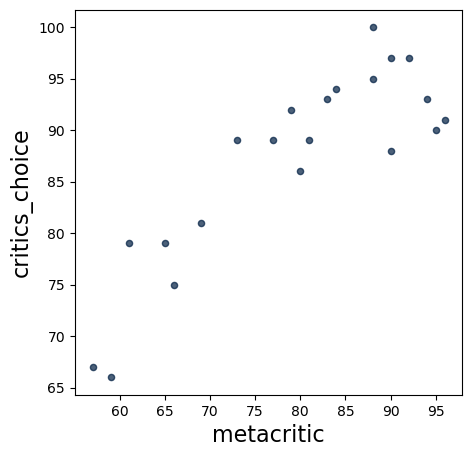

In [37]:
rmc.scatter("metacritic", "critics_choice")

### Student Challenge #1
Describe what you see in this graph. Do you think there is a correlation? Positive or negative. Strong, moderate or weak?

## Standardizing the ratings

To standardize a data set, you simply subtract the average from each point and divide by the standard deviation. The standarizded data will then have a mean of zero and a standard deviation of one.

$$ z = \frac{x - \bar{x}}{\sigma} $$

Let's create a function to do this.

In [38]:
def standard_units(any_numbers):
    "Convert any array of numbers to standard units."
    return (any_numbers - np.mean(any_numbers)) / np.std(any_numbers)  

In [39]:
# Test the function
x = make_array(1, 3, 2, 8, 3, 4, 11)
y = standard_units(x)
print(f"The mean of y is {np.mean(y)}")
print(f"The standard deviation of y is {np.std(y)}")

The mean of y is 9.516197353929913e-17
The standard deviation of y is 1.0


### Student Challenge #2
Explain why this last cell shows the function is working.

Now we will loop over all of the column names, and for each, standardize the data and add it to the table.

In [40]:
for col in rmc.labels:
    rmc = rmc.with_columns(col + "_standardized", standard_units(rmc.column(col)))
rmc.show(5)

rotten_tomatoes,metacritic,critics_choice,rotten_tomatoes_standardized,metacritic_standardized,critics_choice_standardized
100,88,100,0.804505,0.709515,1.40181
96,79,92,0.524097,-0.0313598,0.529572
99,90,97,0.734403,0.874154,1.07472
97,90,88,0.594199,0.874154,0.0934539
74,73,89,-1.01815,-0.525276,0.202483


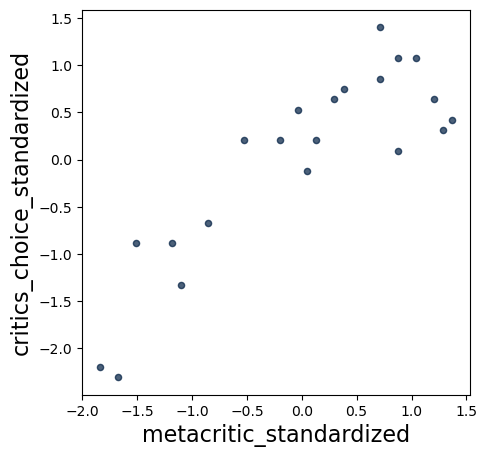

In [41]:
rmc.scatter("metacritic_standardized", "critics_choice_standardized")

### Student Challenge 3
Does standardizing the data change the pattern of the relationship between the two variables?
If so, how. If not, why not?

## Calculating the Correlation Coefficient

The correlation coefficent *r* is just the average of the product of the values in once they are put in standard units.

In [45]:
x = rmc.column("metacritic_standardized")
y = rmc.column("critics_choice_standardized")
r = np.mean(x * y)
print(f"The correlation coefficent is {round(r,2)}")

The correlation coefficent is 0.86


### Student Challenge #4
Calculate the correlation between the ratings by Metacritice and Rotten Tomatoes. Is this correlation stronger or weaker? Is that what you ex